In [4]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import io
from scipy import misc
import pydotplus
import collections
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.metrics import *

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<b>1. Write a small paragraph describing the dataset that you choose, its features, number of instances, nature of the data, and anything else that you found to be interesting.</b>
><u>Data Set Information:</u>
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.<br>
<u>Attribute Information:</u>
1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 
It has 1372 instances for 5 features which are listed above


In [5]:
bank_data = pd.read_csv(
'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt',
                           names = ["variance", "skewness", "curtosis", "entropy", "class"], sep= ',', header= None)

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
bank_data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [8]:
bank_data.describe(include="all")

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


<b> 2. Provide a brief analysis of the dataset you downloaded. Does it have missing data? Are the features numeric/discrete/categorical? Create some histograms/boxplots/other visualizations to illustrate the content of the dataset.</b>
> Missing Attribute Values: none
> <br> It has 5 features where 4 are continuous and one is numeric. 


In [9]:
bank_data

,variance,skewness,curtosis,entropy,class
0,3.621600,8.66610,-2.807300,-0.446990,0
1,4.545900,8.16740,-2.458600,-1.462100,0
2,3.866000,-2.63830,1.924200,0.106450,0
3,3.456600,9.52280,-4.011200,-3.594400,0
4,0.329240,-4.45520,4.571800,-0.988800,0
5,4.368400,9.67180,-3.960600,-3.162500,0
6,3.591200,3.01290,0.728880,0.564210,0
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,0
9,1.535600,9.17720,-2.271800,-0.735350,0


In [10]:
bank_data.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [11]:
bank_data.shape

(1372, 5)

In [12]:
len(bank_data)

1372

In [13]:
bank_data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [14]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [15]:
bank_data["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

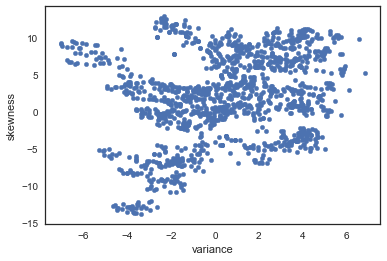

In [16]:
bank_data.plot(kind="scatter", x="variance", y="skewness")

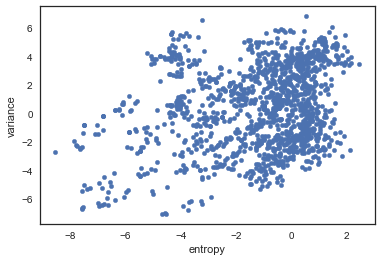

In [17]:
bank_data.plot(kind="scatter", x="entropy", y="variance")

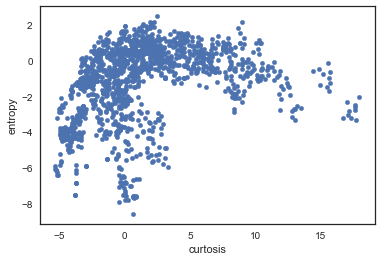

In [18]:
bank_data.plot(kind="scatter", x="curtosis", y="entropy")

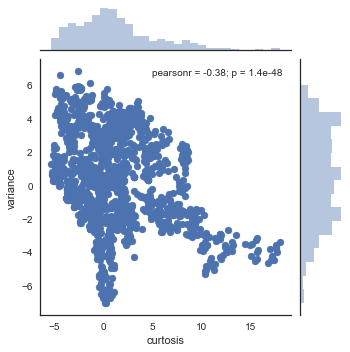

In [19]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="curtosis", y="variance", data=bank_data, size=5)

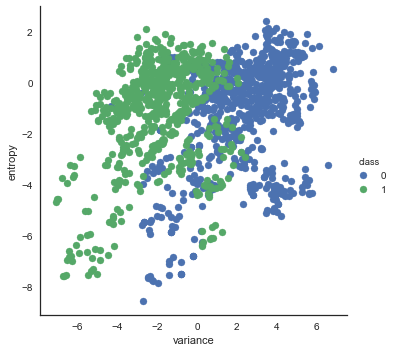

In [20]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(bank_data, hue="class", size=5) \
   .map(plt.scatter, "variance", "entropy") \
   .add_legend()

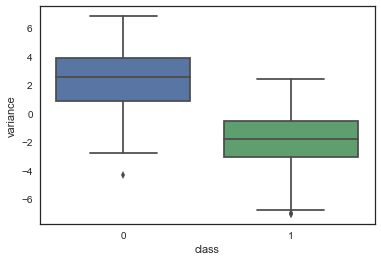

In [21]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="class", y="variance", data=bank_data)

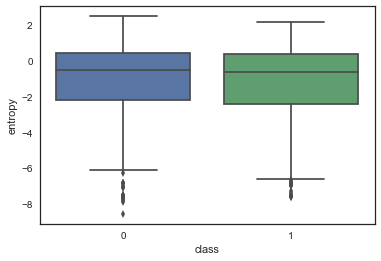

In [22]:
sns.boxplot(x="class", y="entropy", data=bank_data)

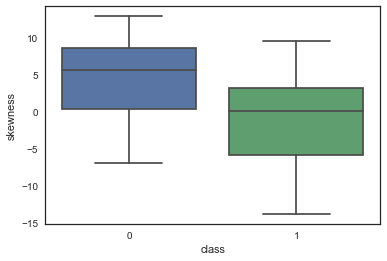

In [23]:
sns.boxplot(x="class", y="skewness", data=bank_data)

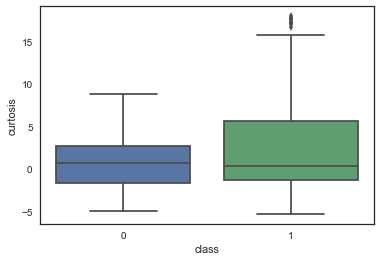

In [24]:
sns.boxplot(x="class", y="curtosis", data=bank_data)

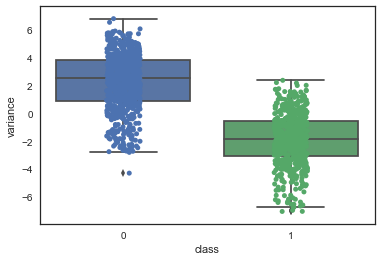

In [25]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="class", y="variance", data=bank_data)
ax = sns.stripplot(x="class", y="variance", data=bank_data, jitter=True, edgecolor="gray")

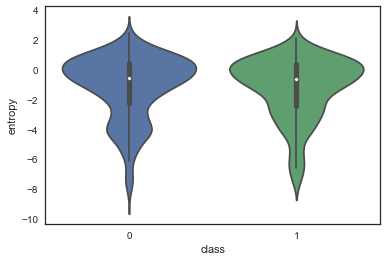

In [26]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="class", y="entropy", data=bank_data, size=6)

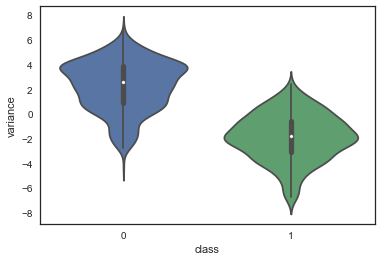

In [27]:
sns.violinplot(x="class", y="variance", data=bank_data, size=6)

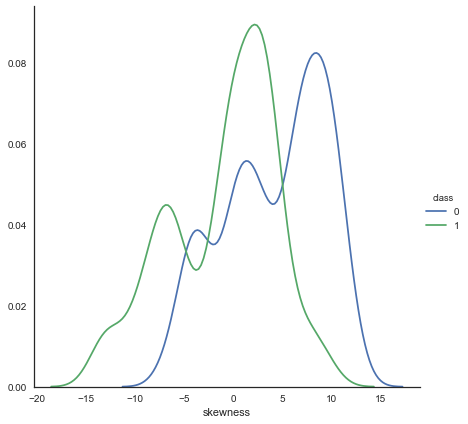

In [28]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(bank_data, hue="class", size=6) \
   .map(sns.kdeplot, "skewness") \
   .add_legend()

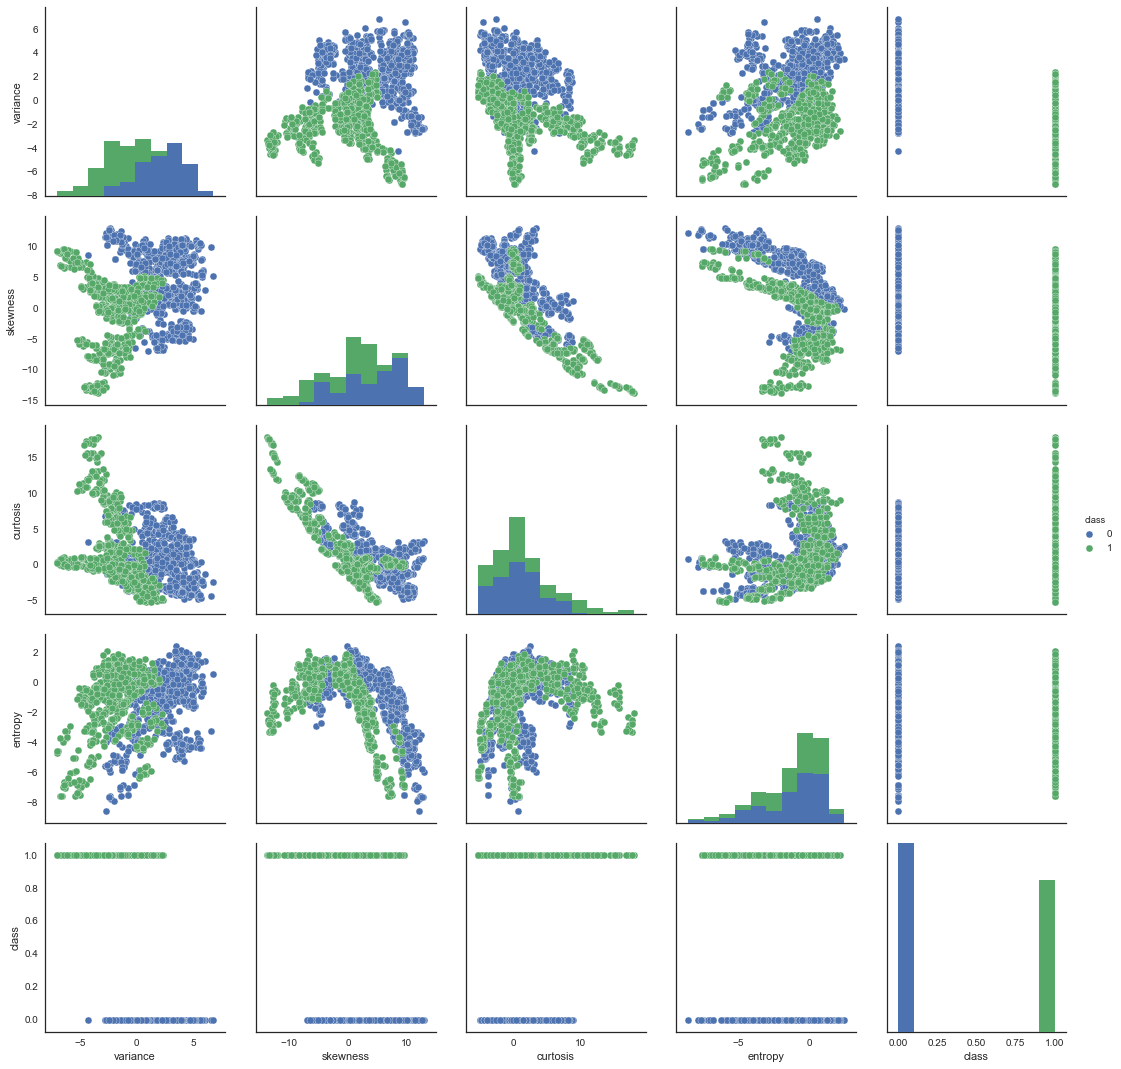

In [29]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
sns.pairplot(bank_data, hue="class", size=3)

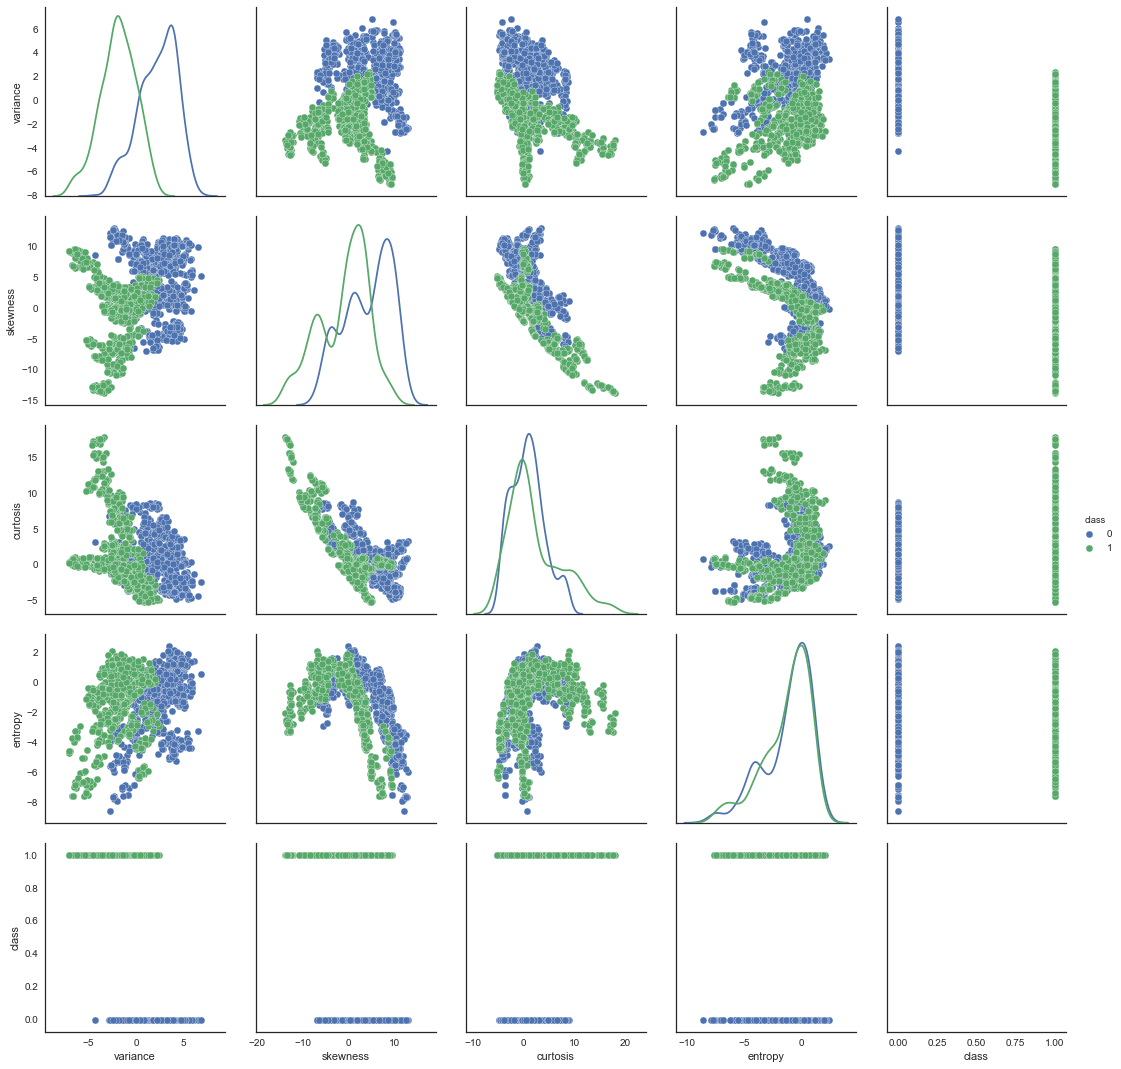

In [30]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(bank_data, hue="class", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001542D928470>,
      dtype=object)

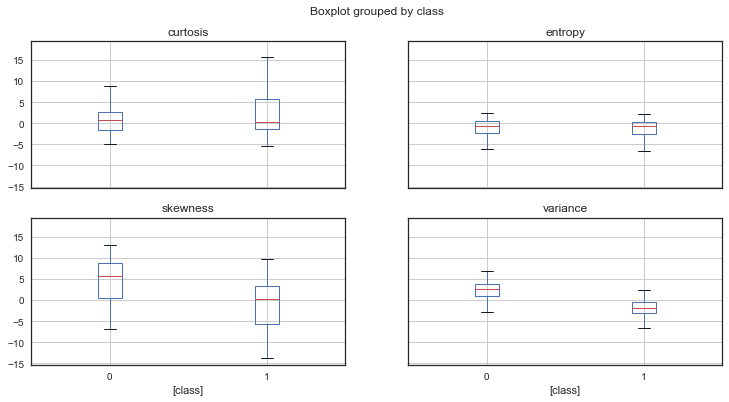

In [31]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
bank_data.boxplot(by="class", figsize=(12, 6))

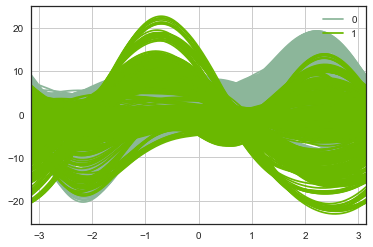

In [32]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(bank_data, "class")

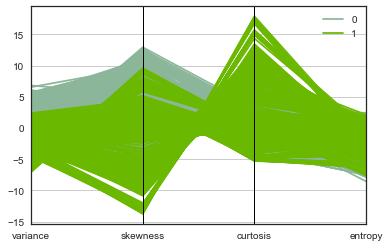

In [33]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(bank_data, "class")

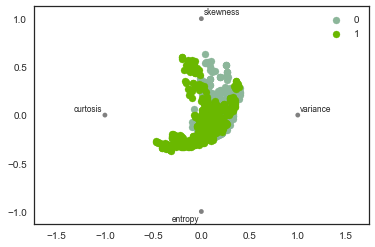

In [34]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(bank_data, "class")

<b> 3. Using scikit-learns DecisionTreeClassifier, train a supervised learning model that can be used to generate predicions for your data. A reference to how you can do that can be found on scikit-learn.

In [35]:
X = bank_data.values[:, 0:4]
Y = bank_data.values[:,4]

In [36]:
X

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [38]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
clf_gini = clf_gini.fit(X_train, y_train)

In [39]:
clf_gini

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [40]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
clf_entropy = clf_entropy.fit(X_train, y_train)

In [41]:
clf_entropy

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [42]:
y_test

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1.

In [43]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1.

In [44]:
y_proba = clf_gini.predict_proba(X_test)
y_proba

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [45]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1.

<b> 4. The link above explains how you can generate a visual output for the tree you just trained.
Use that code snippet to create a visualization of your tree.


In [46]:
# Visualize data
import pydotplus
import collections
from sklearn import tree

data_feature_names = ["variance", "skewness", "curtosis", "entropy"]
dot_data = tree.export_graphviz(clf_gini,
                                feature_names=data_feature_names,
                                class_names = "class",
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree_gini_8B.png')

True

<img src = "tree_gini_8B.png"/>

In [47]:
import pydotplus
import collections
from sklearn import tree

data_feature_names = ["variance", "skewness", "curtosis", "entropy"]
dot_data = tree.export_graphviz(clf_entropy,
                                feature_names=data_feature_names,
                                class_names = "class",
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree_entropy_8B.png')

True

<img src = "tree_entropy_8B.png"/>

<b> 5. Create a new instance with your choice of values for each of the features. Use your trained model to generate a prediction for it. Using your tree illustration as a reference, write a short paragraph describing how your model went about generating that specific prediction. Does it make sense to you? Can it be improved? Go back and play with the parameters that you used for training your tree and see if you can obtain better results.


In [48]:
clf_gini.predict([[4, 4, 3, 3]])

array([0.])

> variance <= 0.32 is FALSE <br>
then curtosis <= -4.443 is FALSE<br>
then variance <= 1.592 is FALSE<br>
then variance <= 2.018 is FALSE
so the category for this instance is 0


In [49]:
clf_entropy.predict([[4, 4, 3, 3]])

array([0.])

> variance <= 0.76 is FALSE<br>
then curtosis <= -1.838 is FALSE<br>
So the category for this instance is 0.<br>

>## Parameter Tuning

In order to tune the hyperparameters, RandomizedSearchCV is used here. Though it doesn't use the entire dataset but only a chunk we can get an idea of best suited hyperparameters and the score so obtained.

In [50]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 5),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_*100))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 7}
Best score is 97.39583333333334


## Assignment - 8B
<b> Retrain your model using the above suggestions (be sure to split your data into
train/test where appropriate), and deliver a notebook containing a detailed evaluation report
listing the metrics listed below, along with your commentary to each:
1. The accuracy of your model on the test data
2. The precision and recall values
3. A classification report (scikit-learn has a function that can create this for you)
4. The confusion matrix for this experiment
5. An ROC curve
6. A Precision/Recall curve


In [51]:
print ("Accuracy for decision tree with gini index as criteria is ", accuracy_score(y_test,y_pred)*100)

Accuracy for decision tree with gini index as criteria is  99.27184466019418


><b>This means that the model is almost perfect fit for this particular dataset. We can cross-check it by comparing y_test and y_pred which are almost same.

In [52]:
print("Accuracy for decision tree with entropy as criteria is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy for decision tree with entropy as criteria is  99.51456310679612


> <b> We observe similar accuracy for this case because both gini and entropy work on the similar concepts, but entropy has a slightly better accuracy for this dataset.

In [53]:

average_precision = average_precision_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision score for decision tree with gini as criteria : {0:0.2f}'.format(precision))
print('Recall score for decision tree with gini as criteria : {0:0.2f}'.format(recall))
print('Average precision-recall score for decision tree with gini as criteria : {0:0.2f}'.format(average_precision))

Precision score for decision tree with gini as criteria : 1.00
Recall score for decision tree with gini as criteria : 0.98
Average precision-recall score for decision tree with gini as criteria : 0.99


In [54]:

average_precision = average_precision_score(y_test, y_pred_en)
precision = precision_score(y_test, y_pred_en)
recall = recall_score(y_test, y_pred_en)
print('Precision score for decision tree with gini as criteria : {0:0.2f}'.format(precision))
print('Recall score for decision tree with gini as criteria : {0:0.2f}'.format(recall))

Precision score for decision tree with gini as criteria : 0.99
Recall score for decision tree with gini as criteria : 0.99


> <b>As we can see we have high scores for both precision and recall which shows that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

Text(0.5,1,'2-class Precision-Recall curve: AP=0.99')

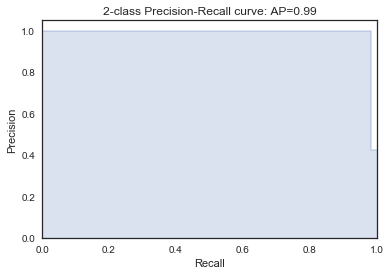

In [55]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Text(0.5,1,'2-class Precision-Recall curve: AP=0.99')

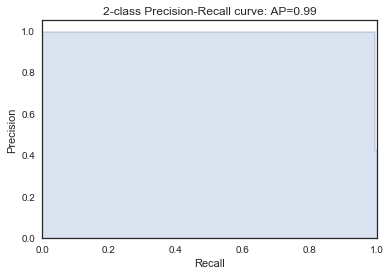

In [56]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred_en)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

> <b> The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

In [57]:
import sklearn
print(sklearn.metrics.classification_report(y_test, y_pred))
## precision for class 1 in this case is 1 which means there was no false positive 
## recall for class 0 in this case is 1 which means there was no false negative

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99       238
        1.0       1.00      0.98      0.99       174

avg / total       0.99      0.99      0.99       412



In [58]:
import sklearn
print(sklearn.metrics.classification_report(y_test, y_pred_en))
## precision for class 0 in this case is 1 which means there was no false positive 
## recall for class 1 in this case is 1 which means there was no false negative

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       238
        1.0       0.99      0.99      0.99       174

avg / total       1.00      1.00      1.00       412



><b>The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.<br>
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.<br>
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.<br>
The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.<br>
The support is the number of occurrences of each class in y_true.<br>
The last line gives a weighted average of precision, recall and f1-score where the weights are the support values.<br>
The total is just for total support which is 412 here.<br>

In [59]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(238, 0, 3, 171)

In [60]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_en).ravel()
tn, fp, fn, tp

(237, 1, 1, 173)

In [61]:
y_actual = pd.Series(y_test, name='Actual')
y_predict = pd.Series(y_pred, name='Predicted')
confusion = pd.crosstab(y_actual, y_predict, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [62]:
confusion

Predicted,0.0,1.0,All
Actual,,,
0.0,238,0,238
1.0,3,171,174
All,241,171,412


><b>In this case:<br>
   For class 0, only 3 instances were mis-predicted<br>
    For class 1, there were no wrong predictions at all

In [63]:
y_actual = pd.Series(y_test, name='Actual')
y_predict_en = pd.Series(y_pred_en, name='Predicted')
confusion_en = pd.crosstab(y_actual, y_predict_en, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [64]:
confusion_en

Predicted,0.0,1.0,All
Actual,,,
0.0,237,1,238
1.0,1,173,174
All,238,174,412


> <b>When we used entropy as criteria in decision tree we got only mis-prediction for both class 0 and 1

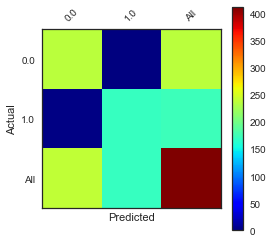

In [65]:
def plot_confusion_matrix(confusion, title='Confusion matrix', cmap='jet'):
    plt.matshow(confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(confusion.columns))
    plt.xticks(tick_marks, confusion.columns, rotation=45)
    plt.yticks(tick_marks, confusion.index)
    #plt.tight_layout()
    plt.ylabel(confusion.index.name)
    plt.xlabel(confusion.columns.name)

plot_confusion_matrix(confusion)

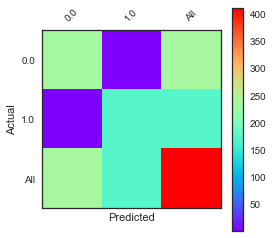

In [66]:
def plot_confusion_matrix(confusion_en, title='Confusion matrix', cmap='rainbow'):
    plt.matshow(confusion_en, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(confusion_en.columns))
    plt.xticks(tick_marks, confusion_en.columns, rotation=45)
    plt.yticks(tick_marks, confusion_en.index)
    #plt.tight_layout()
    plt.ylabel(confusion_en.index.name)
    plt.xlabel(confusion_en.columns.name)

plot_confusion_matrix(confusion_en)

ROC score for decision tree with gini as criteria:  0.9913793103448276


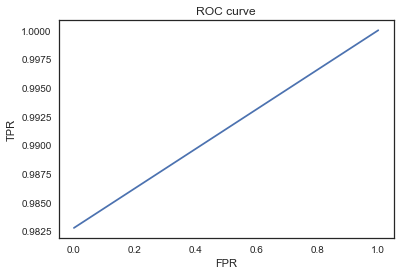

In [69]:
from sklearn.metrics import *
print ("ROC score for decision tree with gini as criteria: ", roc_auc_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

ROC score for decision tree with entropy as criteria:  0.9950255964454747


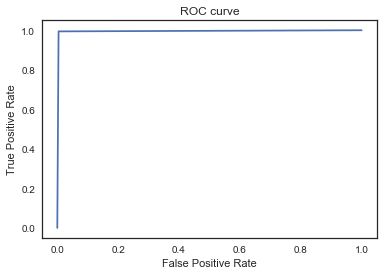

In [70]:
print ("ROC score for decision tree with entropy as criteria: ", roc_auc_score(y_test, y_pred_en))

fpr, tpr, _ = roc_curve(y_test, y_pred_en)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

> <b>In a Receiver Operating Characteristic (ROC) curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. A test with perfect discrimination (no overlap in the two distributions) has a ROC curve that passes through the upper left corner (100% sensitivity, 100% specificity). Therefore the closer the ROC curve is to the upper left corner, the higher the overall accuracy of the test.